In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["dark_background", "ggplot"])

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 40

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

from functools import partial

In [2]:
import utils.plots as plot
from utils.generateOrbits import last_value_orbit, generate_orbit

# Tests 

In [3]:
#with plt.style.context('dark_background'):
#    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
#plt.show()

# Caos introduction 

## Functions 

- Functions are deterministics if their output is completely defined by their input. 
- If a function is not deterministic, it is stochastic 

obs: (The root of the word stochastic is stochos which means "guess" or "target" in ancient Greek).

### Functions as Actions

<img src="figures/functions/function_as_action.svg">

Let $f$ be the action triple. That is, the function takes a number $x$ as input and returns $3x$. For instance, if the input is 4 the output is 12. There are some ways to write this, such as:

- $$f(4) = 12$$ 

-  $$4 \xrightarrow[]{f}12$$

### Functions as Maps

<img src="figures/functions/function_as_map.png">

A function can also be understood as a mapping between sets (My favorite). Let's call this function $g$. Mathematically we would write:

$$
f: Input \rightarrow Output
$$

which means **f is a function that maps Input to Output**.

### Function as Graphs

Let's represent the previously function ($g$) as a graph.

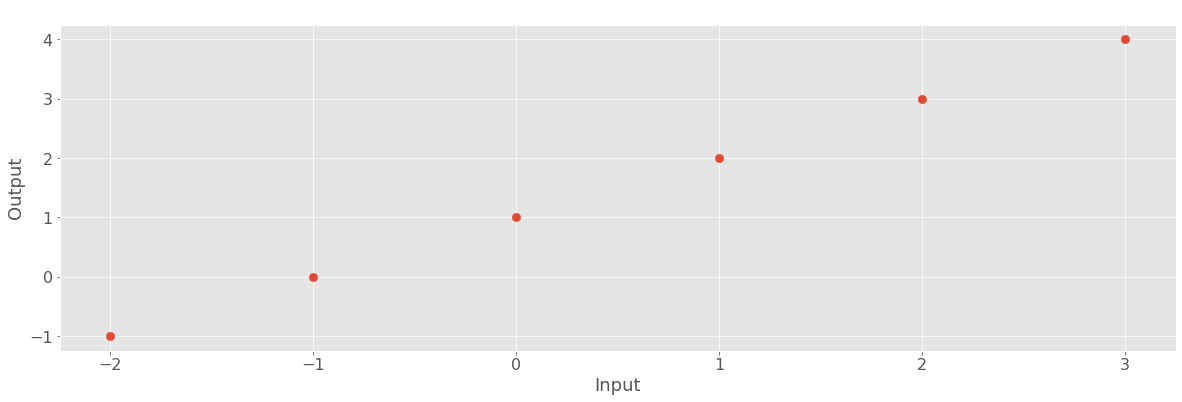

In [4]:
plt.figure(figsize=(20,6))
input_x = [-2, -1, 0, 1, 2, 3]
input_y = [-1,  0, 1, 2, 3, 4]
plt.scatter(input_x, input_y, s = 70)
plt.title(r"$g$")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

Let $f$ be a new function which will map the missing pairs values on the graph.

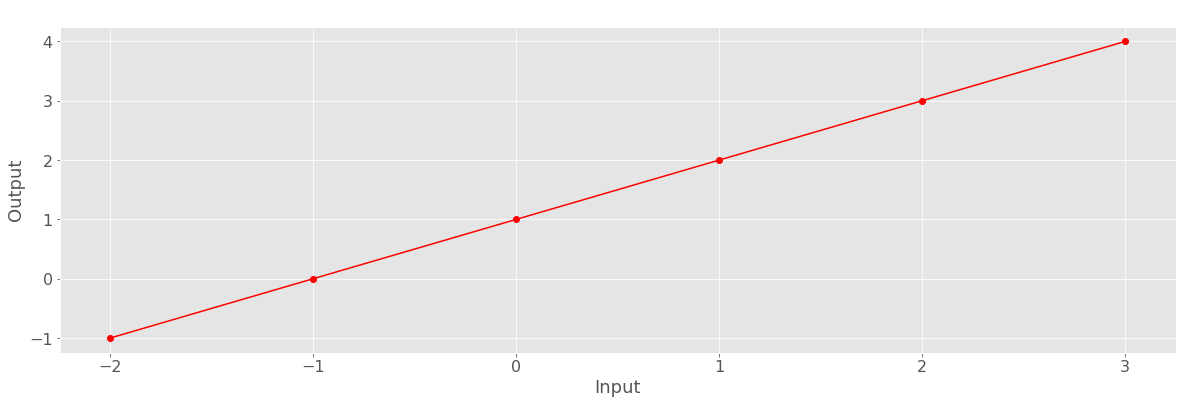

In [5]:
plt.figure(figsize=(20,6))
input_x = [-2, -1, 0, 1, 2, 3]
input_y = [-1,  0, 1, 2, 3, 4]
plt.plot(input_x, input_y, 'r-o')
plt.title(r"$f$")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Iterating Functions

Iterated functions are ```dynamical systems``` (a generic name for a variable or set of variables that change over time.)

<img style="width: 300px;" src="figures/functions/iteration_process.png">

A easier way to observe the iterating process is with a series, which is normally called ```itinerary``` or ```orbit``` (which I prefer and use throughout the text). For instance, this is a orbit with 4 steps.

- $$2 \xrightarrow[]{f}4 \xrightarrow[]{f}8 \xrightarrow[]{f}16 \xrightarrow[]{f}32$$

Similary we can write the same orbit as a function composition, given that $f(g(x)) \text{ is equals to } f\circ g (x)$

- $$  f \circ f\circ f \circ f (2)$$
- $$  f( f( f( f(2)))) $$

However, the best way to indicate a series is with the follwing notation:

- $$ f^{(4)}(x)$$



In [6]:
def mult2(x):
    return x*2

print(mult2(2))
print(mult2(4))
print(mult2(8))
# We can compute this orbit
print(mult2(mult2(mult2(mult2(2)))))

4
8
16
32


In [7]:
def square(x):
    return x**2

print(square(2))
print(square(4))
print(square(square(square(2))))

4
16
256


In [8]:
# signature: func, initial_value, steps
print(last_value_orbit(mult2, 2, 4))
print(last_value_orbit(square, 2, 3))

32
256


## Exploring functions

### Basic Plot 

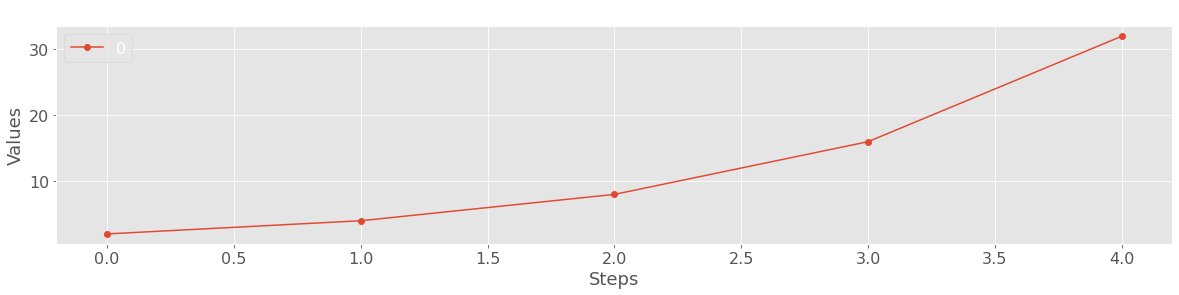

In [9]:
y = generate_orbit(mult2, 2, 4, [])
fig = plt.figure(figsize = (20,4))
_=plot.plot_orbit(y, "Orbit mult2", "Steps", "Values")

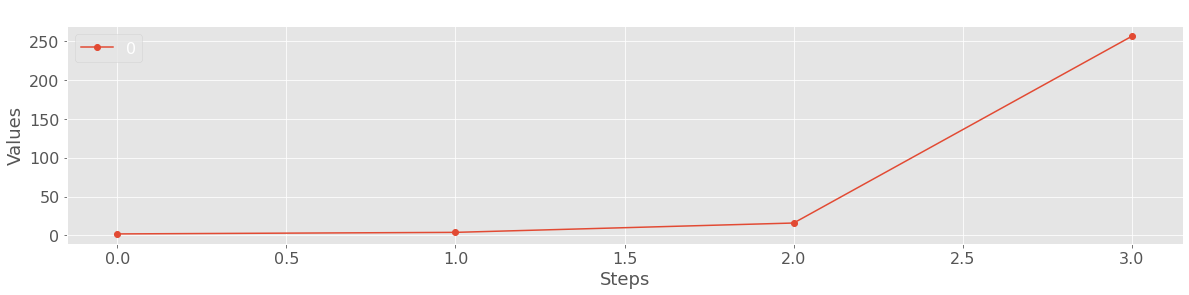

In [10]:
y = generate_orbit(square, 2, 3, [])
fig = plt.figure(figsize = (20,4))
_=plot.plot_orbit(y, "Orbit square", "Steps", "Values")

### Exploring big steps

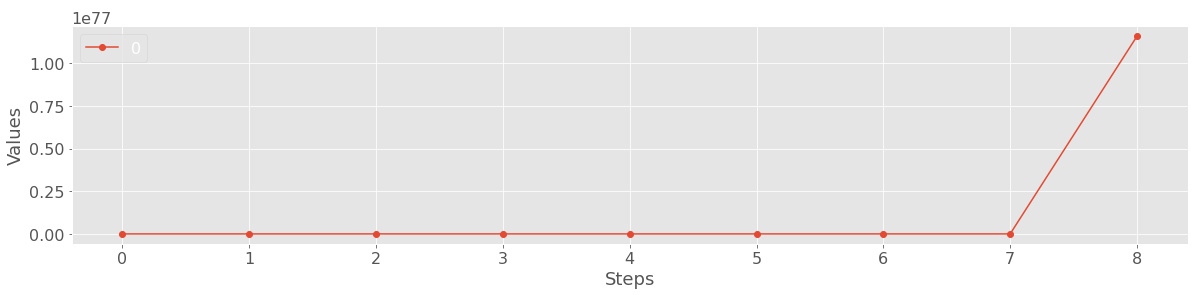

In [11]:
y = generate_orbit(square, 2, 8, [])
fig = plt.figure(figsize = (20,4))
_=plot.plot_orbit(y, "Orbit square", "Steps", "Values")

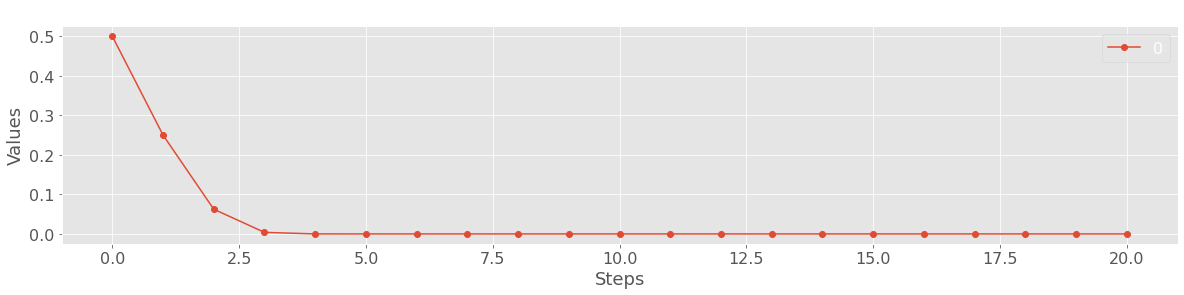

In [12]:
y = generate_orbit(square, 0.5, 20, [])
fig = plt.figure(figsize = (20,4))
_=plot.plot_orbit(y, "Orbit square", "Steps", "Values")

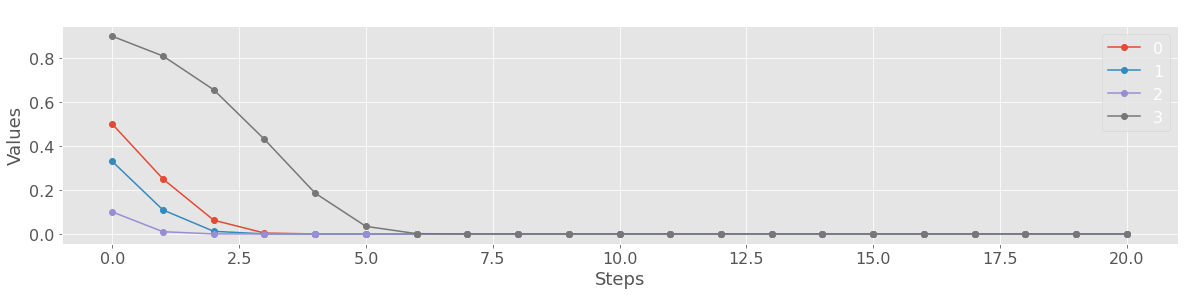

In [13]:
y0 = generate_orbit(square, 0.5, 20, [])
y1 = generate_orbit(square, 0.33, 20, [])
y2 = generate_orbit(square, 0.1, 20, [])
y3 = generate_orbit(square, 0.9, 20, [])
fig = plt.figure(figsize = (20,4))

_ = plot.plot_orbit([y0,y1,y2,y3], "Orbit square", "Steps", "Values")

## Fixed points

It is the initial value where the following equation holds:

$$f(x) = x$$

The fixed point of the ```square_function``` ($x^2$) is 0 and 1

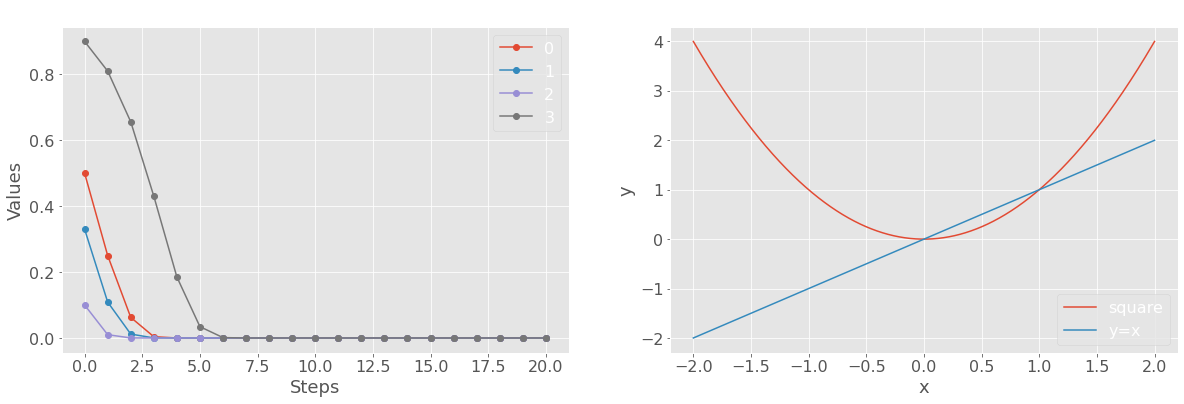

In [22]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize = (20,6))

y0 = generate_orbit(square, 0.5, 20, [])
y1 = generate_orbit(square, 0.33, 20, [])
y2 = generate_orbit(square, 0.1, 20, [])
y3 = generate_orbit(square, 0.9, 20, [])

plot.plot_orbit([y0,y1,y2,y3], "Orbit square", "Steps", "Values", ax1)
plot.plot_func(square, (-2,2), "square function", "x", "y", ax2)

plt.show()

## Butterfly effect

In [16]:
def logistc_equation(r, x):
    return r*x*(1-x)

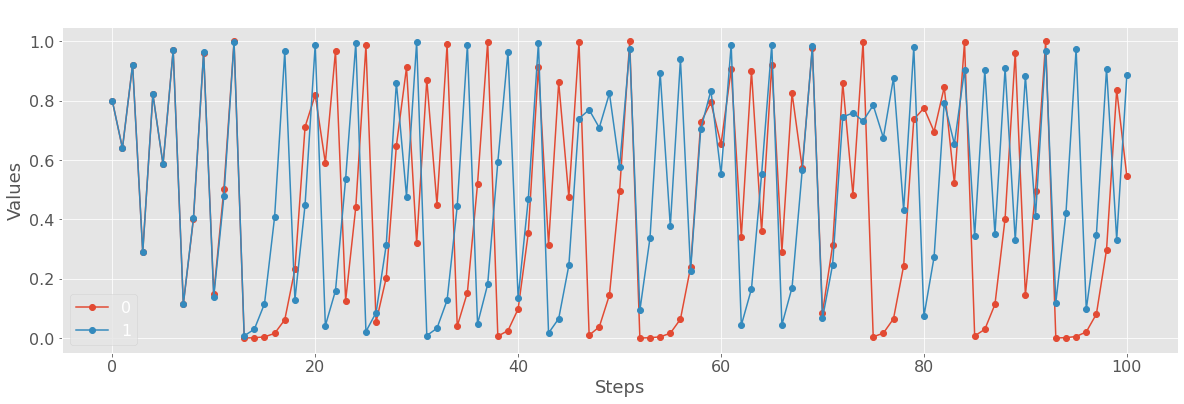

In [23]:

logistc_equation_4 = partial(logistc_equation, 4)

y0 = generate_orbit(logistc_equation_4, 0.8, 100, [])
y1 = generate_orbit(logistc_equation_4, 0.80001, 100, [])

fig = plt.figure(figsize = (20,6))
_=plot.plot_orbit([y0,y1], "Orbit logistc_equation_4", "Steps", "Values")

plt.show()

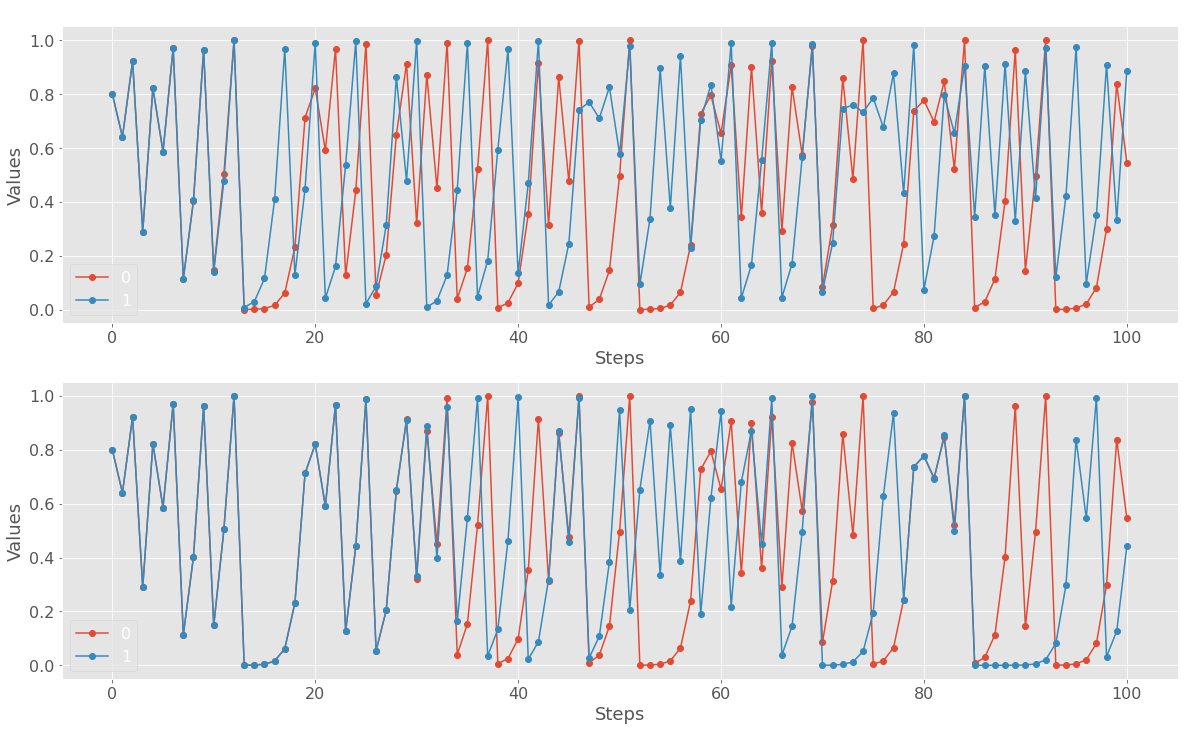

In [25]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (20,12))

y0 = generate_orbit(logistc_equation_4, 0.8, 100, [])
y1 = generate_orbit(logistc_equation_4, 0.80001, 100, [])
y2 = generate_orbit(logistc_equation_4, 0.80000000001, 100, [])

_=plot.plot_orbit([y0,y1], "Orbit", "Steps", "Values", ax1)
_=plot.plot_orbit([y0,y2], "Orbit", "Steps", "Values", ax2)

plt.show()

## References 

**Book:**

- Chaos and fractals An elementary introduction - by David P. Feldman 